In [6]:
# Standard Libraries
import argparse
import os
import sys
from tqdm import tqdm

# Type Hint Libraries
from typing import Optional, Tuple, Union, TypeVar, List
import numpy.typing as npt
import matplotlib.figure

# Math Libraries
import numpy as np
from scipy.ndimage.filters import convolve

# Plot Libraries
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Image Libraries
import cv2 

import skimage as ski
from skimage import io
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb

In [5]:
print(sys.prefix)

C:\Users\rzamb\anaconda3\envs\msml640


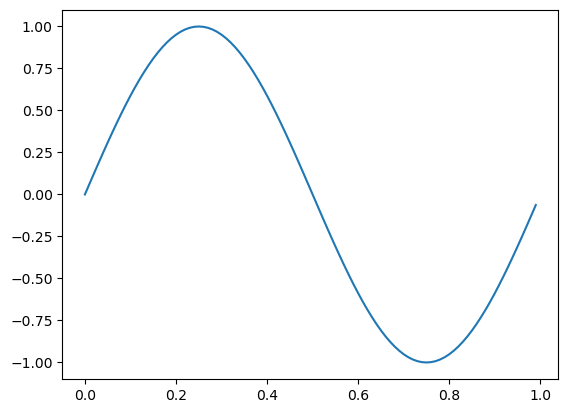

In [9]:
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

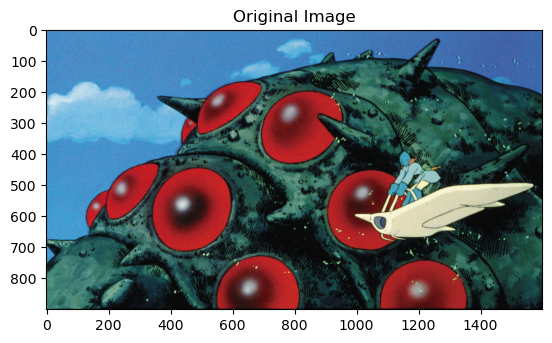

In [11]:
PATH_NAUSICAA = '..\\Zambrano_Ricardo_ASN4_py\\input_nausicaa.jpg'

img_raw = io.imread(PATH_NAUSICAA)
nausicaa = img_raw.copy()

# Showing original image 
plt.imshow(nausicaa)
plt.title("Original Image")
plt.show()

In [ ]:
# Loading image
PATH_NAUSICAA = '..\\Zambrano_Ricardo_ASN4_py\\input_nausicaa.jpg'

img_raw = io.imread(PATH_NAUSICAA)
nausicaa = img_raw.copy()

# Showing original image 
plt.imshow(nausicaa)
plt.title("Original Image")

pixel_coordinates = []

def on_left_click(event):
    if event.button is MouseButton.LEFT:
        pixel_coordinates.append((event.x,event.y))
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_right_click(event):
    if event.button is MouseButton.RIGHT:
        print('disconnecting callback')
        plt.disconnect(binding_id)
        plt.close()
    
    return np.array(pixel_coordinates)

binding_id = plt.connect('button_press_event', on_left_click)
plt.connect('button_press_event', on_right_click)

plt.show()

In [15]:
a = [(1,2),(3,4),(5,6),(7,8)]
b = np.array(a)
print(b)
b.shape

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


(4, 2)

In [17]:
b[0::2,:] # even

array([[1, 2],
       [5, 6]])

In [18]:
b[1::2,:] # odd

array([[3, 4],
       [7, 8]])

In [26]:
a = np.reshape(np.random.randint(0,480,20),(2,10))
print(a.shape)
print(np.max(a),np.min(a))
a

(2, 10)
435 25


array([[340, 192, 154,  98,  42,  86, 434, 212, 201, 154],
       [412,  25,  90, 304, 405, 384, 176, 394, 435, 252]])

In [55]:
def scale_down(arr):
    """
    Assumes a numpy array with coordinates from corresponding points with shape 2xP
    Returns the coordinates scaled to a range between 0 and 2
    """
    
    scaled_arr = np.zeros_like(arr,dtype=np.double)
    
    rmin = np.min(arr) # denotes the minimum of the range of your measurement
    rmax = np.max(arr) # denotes the maximum of the range of your measurement
    
    tmin = 0 # denotes the minimum of the range of your desired target scaling
    tmax = 2 # denotes the maximum of the range of your desired target scaling
    
    for i in range(scaled_arr.shape[1]):
        coord = arr[:,i]
        x_scaled = ((coord[0]-rmin)/(rmax-rmin))*(tmax-tmin) + tmin
        y_scaled = ((coord[1]-rmin)/(rmax-rmin))*(tmax-tmin) + tmin
        #print(scaled_arr[:,i],coord,(x_scaled,y_scaled))
        scaled_arr[:,i] = np.array([x_scaled,y_scaled])
        #print(scaled_arr[:,i],coord,(x_scaled,y_scaled))
    return scaled_arr, rmin, rmax

In [56]:
b,c,d = scale_down(a)
b

array([[1.53658537, 0.81463415, 0.62926829, 0.35609756, 0.08292683,
        0.29756098, 1.99512195, 0.91219512, 0.85853659, 0.62926829],
       [1.88780488, 0.        , 0.31707317, 1.36097561, 1.85365854,
        1.75121951, 0.73658537, 1.8       , 2.        , 1.10731707]])

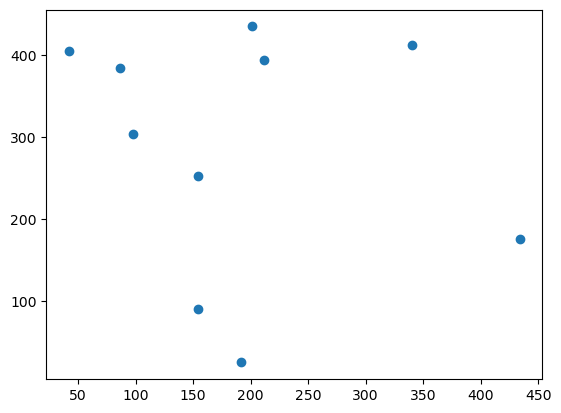

In [57]:
plt.scatter(a[0,:],a[1,:])
plt.show()

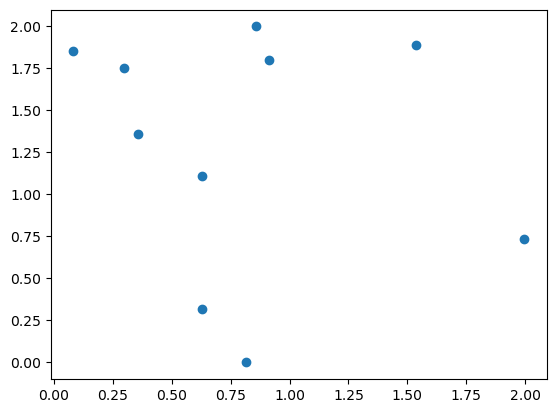

In [58]:
plt.scatter(b[0,:],b[1,:])
plt.show()

In [61]:
def scale_back(arr,rmin,rmax):
    """
    Assumes a numpy array with coordinates from corresponding points scaled down to a range from 0 to 2. Matrix shape = 2xP
    It also assumes rmin and rmax, the range of values corresponding to the orinigal image. Both values are floats.
    Returns the coordinates scaled back to the original range.
    """
    
    scaled_up = np.zeros_like(arr,dtype=np.double)
    
    tmin = 0 # denotes the minimum of the range of your desired target scaling
    tmax = 2 # denotes the maximum of the range of your desired target scaling
    
    for i in range(scaled_up.shape[1]):
        coord = arr[:,i]
        x_scaled = ((coord[0]-tmin)/(tmax-tmin))*(rmax-rmin) + rmin
        y_scaled = ((coord[1]-tmin)/(tmax-tmin))*(rmax-rmin) + rmin
        scaled_up[:,i] = np.array([x_scaled,y_scaled])
        
    return scaled_up

In [62]:
e = scale_back(b,c,d)
e

array([[340., 192., 154.,  98.,  42.,  86., 434., 212., 201., 154.],
       [412.,  25.,  90., 304., 405., 384., 176., 394., 435., 252.]])

In [65]:
(a - e) < 0.00001

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [66]:
f = np.reshape(np.random.randint(0,480,20),(2,10))
f

array([[227, 326,  16, 173, 227, 111, 122,  33, 209, 201],
       [399, 332, 310, 296,  49, 269, 450, 266,  80, 129]])

In [67]:
P = f.shape[1]

(2, 10)

In [241]:
def computeH(t1: npt.NDArray, t2: npt.NDArray)-> npt.NDArray:
    
    P = t1.shape[1] # Number of identified corresponding points
    N = P*2 # Number of rows for L matrix
    
    # Creating the first pair of rows for L
    
    x_coord_view_A = t1[0,0]
    y_coord_view_A = t1[1,0]
    x_coord_view_B = t2[0,0]
    y_coord_view_B = t2[1,0]

    L = np.array([
    [x_coord_view_A, y_coord_view_A, 1, 0, 0, 0, -1*x_coord_view_B*x_coord_view_A, -1*x_coord_view_B*y_coord_view_A, -1*x_coord_view_B],
    [0, 0, 0, x_coord_view_A, y_coord_view_A, 1, -1*y_coord_view_B*x_coord_view_A, -1*y_coord_view_B*y_coord_view_A, -1*y_coord_view_B]
    ]) 
    
    # Filling the rest of the pairs of rows for L
    
    for i in range(1,P):

        x_coord_view_A = t1[0,i]
        y_coord_view_A = t1[1,i]
        x_coord_view_B = t2[0,i]
        y_coord_view_B = t2[1,i]
        
        rows = np.array([
        [x_coord_view_A, y_coord_view_A, 1, 0, 0, 0, -1*x_coord_view_B*x_coord_view_A, -1*x_coord_view_B*y_coord_view_A, -1*x_coord_view_B],
        [0, 0, 0, x_coord_view_A, y_coord_view_A, 1, -1*y_coord_view_B*x_coord_view_A, -1*y_coord_view_B*y_coord_view_A, -1*y_coord_view_B]
        ])
        
        L = np.vstack((L,rows))
    
    L_transposed = np.transpose(L)
    
    LtL = np.matmul(L_transposed, L)
    
    eigenvalues, eigenvectors = np.linalg.eig(LtL) 
    
    min_eigenval_position = np.argmin(eigenvalues)
    
    homography_matrix = eigenvectors[:,min_eigenval_position]
    
#     U, S, V = np.linalg.svd(L)
#     H = V[-1, :]/V[-1, -1]
    
#     U, S, V = np.linalg.svd(L)
#     H = V[-1].reshape(3, 3)
#     H /= H[2][2]

    # SVD Method
    
    U, S, V = np.linalg.svd(L)  # When compute_uv is True, the result include:
                                # - Vector(s) with the singular values, within each vector sorted in descending order.
                                #   We are interested in the smallest singular value.
                                # - Vh are unitary. The rows of Vh are the eigenvectors of L'L and the columns of U
                                #   are the eigenvectors of LL'. So we are interested in the last row of Vh
                                # source: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
    
    homography_matrix_svd = V[-1,:]
    
    #return L, homography_matrix,homography_matrix_svd, eigenvalues[min_eigenval_position]
    return homography_matrix

In [164]:
g, h, i, j = computeH(a,f)

In [165]:
# Does homography_matrix and homography_matrix_svd have the right dimensions?
print(h.shape)
print(i.shape)

(9,)
(9,)


In [166]:
# Does homography_matrix and homography_matrix_svd satisfy the constraint ||h||^2 = 1?
print(np.sum(h*h))
print(np.sum(i*i))

1.0
1.0000000000000004


In [176]:
# Are homography_matrix and homography_matrix_svd eigenvectors of L'L?
print(np.matmul(np.transpose(g),g).shape) # Checking L'L has the expected dimensions
print(np.matmul(np.matmul(np.transpose(g),g),h)-j*h < 0.00001)
print(np.matmul(np.matmul(np.transpose(g),g),i)-j*i < 0.00001)

(9, 9)
[ True  True  True  True  True  True  True  True  True]
[ True  True False  True  True False False False False]


In [177]:
i

array([-1.06705813e-03, -9.42652010e-04,  5.13041833e-01, -2.04238650e-03,
       -1.51486287e-03,  8.58355375e-01, -5.46602296e-06, -4.07934086e-06,
        2.37382484e-03])

In [178]:
h

array([ 4.42802205e-02,  5.33823509e-02,  1.84418581e-04,  9.42861795e-02,
        8.83196072e-02,  3.32165013e-04,  9.64189640e-01,  1.57494899e-01,
       -1.55025483e-01])

In [179]:
H1 = h.reshape((3,3))
H1

array([[ 4.42802205e-02,  5.33823509e-02,  1.84418581e-04],
       [ 9.42861795e-02,  8.83196072e-02,  3.32165013e-04],
       [ 9.64189640e-01,  1.57494899e-01, -1.55025483e-01]])

In [180]:
H2 = i.reshape((3,3))
H2

array([[-1.06705813e-03, -9.42652010e-04,  5.13041833e-01],
       [-2.04238650e-03, -1.51486287e-03,  8.58355375e-01],
       [-5.46602296e-06, -4.07934086e-06,  2.37382484e-03]])

In [181]:
aa_0 = np.hstack((a[:,0],np.array([1])))
ff_0 = np.hstack((f[:,0],np.array([1])))

In [183]:
np.matmul(H1,aa_0.reshape((3,1)))

array([[ 37.04898795],
       [ 68.44531138],
       [392.5573507 ]])

In [184]:
np.matmul(H2,aa_0.reshape((3,1)))

array([[-0.23813056],
       [-0.46017954],
       [-0.00116531]])

In [185]:
ff_0.reshape((3,1))

array([[227],
       [399],
       [  1]])

In [188]:
k, kmin, kmax = scale_down(a)
l, lmin, lmax = scale_down(f)

In [192]:
m, n, o, p = computeH(k,l)
H3 = n.reshape((3,3))
H4 = o.reshape((3,3))

In [191]:
kk_0 = np.hstack((k[:,0],np.array([1])))
ll_0 = np.hstack((l[:,0],np.array([1])))

In [193]:
np.matmul(H3,kk_0.reshape((3,1)))

array([[0.20571317],
       [0.438517  ],
       [0.25313409]])

In [194]:
np.matmul(H4,kk_0.reshape((3,1)))

array([[0.20571317],
       [0.438517  ],
       [0.25313409]])

In [198]:
# Proving both methods have similar result when distances are scaled down
(np.matmul(H3,kk_0.reshape((3,1)))-np.matmul(H4,kk_0.reshape((3,1)))) < 0.000001

array([[ True],
       [ True],
       [ True]])

In [195]:
ll_0.reshape((3,1))

array([[0.97235023],
       [1.76497696],
       [1.        ]])

Testing computeH()

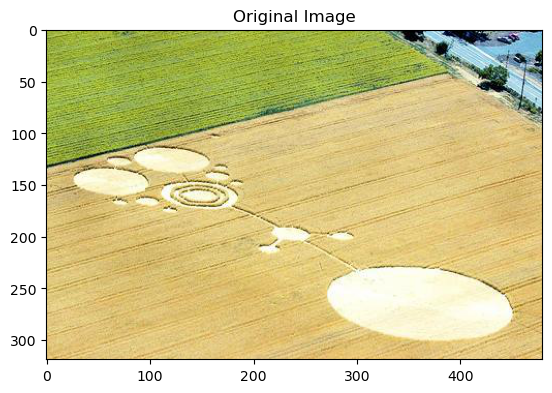

In [199]:
CROP1 = '..\\Zambrano_Ricardo_ASN4_py\\crop1.jpg'
CROP2 = '..\\Zambrano_Ricardo_ASN4_py\\crop2.jpg'

img_raw = io.imread(CROP1)
crop1 = img_raw.copy()
img_raw = io.imread(CROP2)
crop2 = img_raw.copy()

# Showing original image 
plt.imshow(crop1)
plt.title("Original Image")
plt.show()

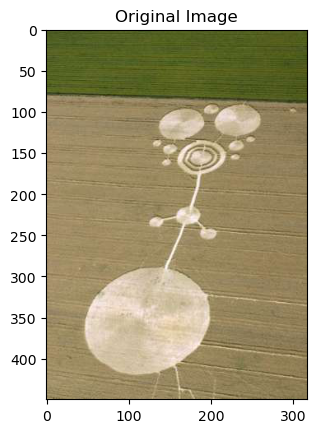

In [200]:
plt.imshow(crop2)
plt.title("Original Image")
plt.show()

In [202]:
cc1 = np.load('..\\Zambrano_Ricardo_ASN4_py\\cc1.npy')
cc2 = np.load('..\\Zambrano_Ricardo_ASN4_py\\cc2.npy')

In [203]:
cc1

array([[138.88139059, 147.40338983],
       [182.29243354, 170.89830508],
       [227.34764826, 191.62711864],
       [256.28834356, 197.64745763],
       [224.60327198, 203.16610169],
       [252.04703476, 205.17288136],
       [299.13496933, 234.90169492],
       [452.55419223, 271.6       ],
       [443.82208589, 256.8       ],
       [223.88752556, 210.68474576],
       [215.90388548, 208.92881356],
       [ 30.21881391, 151.91186441]])

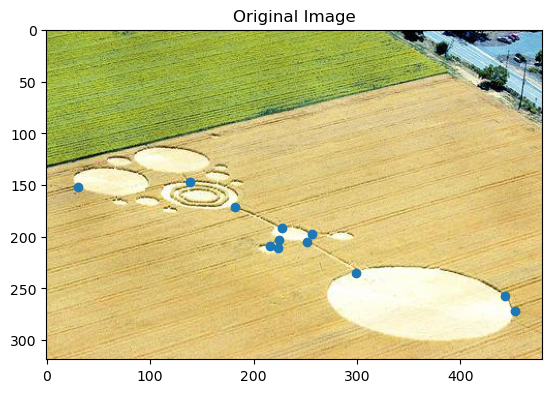

In [204]:
# Showing original image 
plt.imshow(crop1)
plt.title("Original Image")

plt.scatter(cc1[:,0],cc1[:,1])

plt.show()

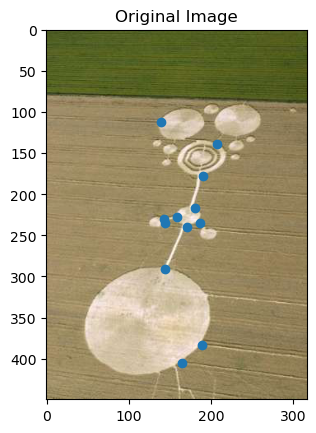

In [205]:
# Showing original image 
plt.imshow(crop2)
plt.title("Original Image")

plt.scatter(cc2[:,0],cc2[:,1])

plt.show()

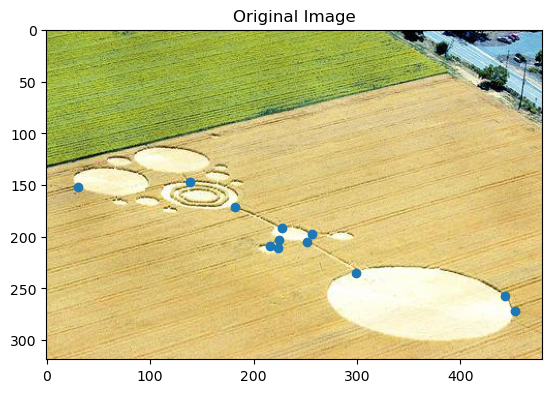

In [206]:
# Testing with transposed data

cc1_t = np.transpose(cc1)

# Showing original image 
plt.imshow(crop1)
plt.title("Original Image")

plt.scatter(cc1_t[0,:],cc1_t[1,:])

plt.show()

In [214]:
# Just in case testing again my scaling methods work
cc1_scaled_down, cc1_min, cc1_max = scale_down(np.transpose(cc1))
cc1_scaled_back = scale_back(cc1_scaled_down, cc1_min, cc1_max)
(cc1 - np.transpose(cc1_scaled_back)) < 0.00001

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [226]:
def to_homogeneous(arr):
    """
    Assumes a numpy array with [x,y]' coordinates from corresponding points with shape 2xP. Top row are x values and bottom row are y values.
    Returns a 3xP numpy array with homogeneous coordinates
    """
    P = arr.shape[1] # Number of identified corresponding points
    ones = np.ones((1,P))

    homogeneous_coord_arr = np.vstack((arr,ones))
    
    return homogeneous_coord_arr

In [227]:
to_homogeneous(a)

array([[340., 192., 154.,  98.,  42.,  86., 434., 212., 201., 154.],
       [412.,  25.,  90., 304., 405., 384., 176., 394., 435., 252.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.]])

In [228]:
a

array([[340, 192, 154,  98,  42,  86, 434, 212, 201, 154],
       [412,  25,  90, 304, 405, 384, 176, 394, 435, 252]])

In [229]:
def from_homogeneous(arr):
    """
    Assumes a numpy array with [x,y,w]' homogeneous coordinates with shape 3xP. 
    Returns a 2xP numpy array with 2D coordinates
    """
    P = arr.shape[1] # Number of identified corresponding points
    
    xy_coord_arr = np.zeros((2,P))
    
    for indx in range(P):
        xy_coord_arr[0,indx] = arr[0,indx]/arr[2,indx]
        xy_coord_arr[1,indx] = arr[1,indx]/arr[2,indx]
        
    return xy_coord_arr

In [230]:
from_homogeneous(to_homogeneous(a))

array([[340., 192., 154.,  98.,  42.,  86., 434., 212., 201., 154.],
       [412.,  25.,  90., 304., 405., 384., 176., 394., 435., 252.]])

In [232]:
np.matmul(H3,kk_0.reshape((3,1)))

array([[0.20571317],
       [0.438517  ],
       [0.25313409]])

In [233]:
from_homogeneous(np.matmul(H3,kk_0.reshape((3,1))))

array([[0.81266481],
       [1.7323506 ]])

In [234]:
ll_0

array([0.97235023, 1.76497696, 1.        ])

In [235]:
# Test begins by transposing points
cc1_t = np.transpose(cc1)
cc2_t = np.transpose(cc2)

In [237]:
# Next step is scaling down the points
cc1_t_scaled, cc1_min, cc1_max = scale_down(cc1_t)
cc2_t_scaled, cc2_min, cc2_max = scale_down(cc2_t)

In [243]:
# Next step is computing matrix h
h_test1 = computeH(cc1_t_scaled,cc2_t_scaled)
print(h_test1.shape)
H_test1 = h_test1.reshape((3,3))
H_test1

(9,)


array([[ 0.20358967, -0.66642173,  0.44135095],
       [ 0.11679646,  0.41433994, -0.23921577],
       [-0.03428866,  0.0248971 ,  0.27441558]])

In [245]:
# Next step is to transform scaled points 1 into homogeneous coordinates
cc1_t_scaled_homog = to_homogeneous(cc1_t_scaled)
print(cc1_t_scaled_homog.shape)
cc1_t_scaled_homog

(3, 12)


array([[0.51457956, 0.72015572, 0.93351798, 1.07056875, 0.92052178,
        1.05048373, 1.27347208, 2.        , 1.95864847, 0.91713232,
        0.87932521, 0.        ],
       [0.55493611, 0.666198  , 0.7643608 , 0.79287056, 0.8190045 ,
        0.82850775, 0.96929072, 1.14307822, 1.07299174, 0.85460959,
        0.84629424, 0.57628632],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]])

In [247]:
def homogeneous_transform_coord(arr,H):
    """
    Assumes an array of points in homogeneous coordinates with shape=3xP and a homography matrix with shape 3x3
    Returns an array of points transformed using the homography matrix
    """
    P = arr.shape[1] # Number of identified corresponding points
    
    transformed_xy_coord_arr = np.zeros((3,P))
    
    for indx in range(P):
        transformed_xy_coord_arr[:,indx] = np.matmul(H,arr[:,indx])
        
    return transformed_xy_coord_arr

In [249]:
np.matmul(H_test1,cc1_t_scaled_homog[:,0])

array([0.17629255, 0.0508175 , 0.27058764])

In [251]:
estimated_cc2 = homogeneous_transform_coord(cc1_t_scaled_homog,H_test1)
estimated_cc2[:,0]

array([0.17629255, 0.0508175 , 0.27058764])

In [252]:
# Next transform the estimated homogenouscoordinates back to 2D coordinates
estimated_cc2_2D_scaled = from_homogeneous(estimated_cc2)
estimated_cc2_2D_scaled

array([[ 6.51517383e-01,  5.40719617e-01,  4.66724219e-01,
         5.08536986e-01,  3.15135800e-01,  3.97968058e-01,
         2.14453026e-01,  3.70290312e-01,  5.34454219e-01,
         2.21533324e-01,  2.12499714e-01,  1.98436552e-01],
       [ 1.87804216e-01,  4.54090542e-01,  7.13445809e-01,
         8.32561603e-01,  7.88792964e-01,  8.75445676e-01,
         1.22070825e+00,  1.99746016e+00,  1.85549336e+00,
         8.40130885e-01,  8.07054607e-01, -1.51447625e-03]])

In [268]:
# Next step is scaling up the estimated coordinates
estimated_cc2_2D = scale_back(estimated_cc2_2D_scaled, cc2_min, cc2_max)
# estimated_cc2_2D_alt = scale_back(estimated_cc2_2D_scaled, cc1_min, cc1_max) # test proved this approach wa wrong, as expected
estimated_cc2_2D

array([[207.1387718 , 190.84868331, 179.96947854, 186.1170184 ,
        157.68212709, 169.86057483, 142.8791995 , 165.79124262,
        189.92751059, 143.92018341, 142.59201298, 140.52437072],
       [138.96114699, 178.11200696, 216.24382486, 233.75687499,
        227.32177229, 240.06192406, 290.82430065, 405.02657834,
        384.15384966, 234.86975196, 230.00669806, 111.12648603]])

In [266]:
np.abs(cc2_t - estimated_cc2_2D)

array([[0.69967401, 0.97342769, 0.42520449, 0.01590593, 0.50805696,
        0.80404685, 1.33961441, 0.86486225, 1.05020998, 0.27204563,
        0.10328354, 1.32191673],
       [0.25241233, 0.42387136, 0.11840113, 0.68041315, 0.09178704,
        0.69243253, 0.05366545, 0.37342166, 0.15384966, 0.46975196,
        0.19330194, 0.22266651]])

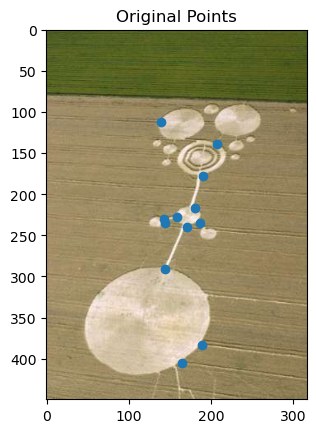

In [269]:
# Now show both plots
# Showing original image 
plt.imshow(crop2)
plt.title("Original Points")

plt.scatter(cc2_t[0,:],cc2_t[1,:])

plt.show()

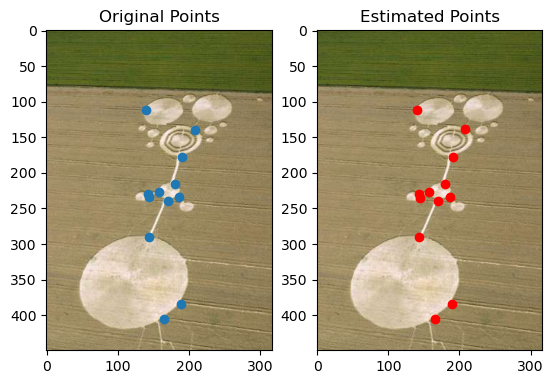

In [273]:
fig = plt.figure()

rows = 1
columns = 2

# Plot 1
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(crop2) 
# plt.axis('off') 
plt.title("Original Points") 

plt.scatter(cc2_t[0,:],cc2_t[1,:])
  
# Plot 2
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(crop2) 
# plt.axis('off') 
plt.title("Estimated Points") 

plt.scatter(estimated_cc2_2D[0,:],estimated_cc2_2D[1,:],c='red')